In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [7]:
House = pd.read_csv('C:\\Users\\Asus\\Documents\\ML\\House Price Prediction\\Housing.csv')

In [8]:
House.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [12]:
House.shape

(545, 13)

In [13]:
House.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:

columns_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
scaler = MinMaxScaler()
House[columns_to_scale] = scaler.fit_transform(House[columns_to_scale])

In [18]:
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]


le = LabelEncoder()
House[categ] = House[categ].apply(le.fit_transform)

In [19]:
House.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,2,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,3,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,2,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,3,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,2,0,0
5,0.787879,0.402062,0.4,0.666667,0.000000,1,0,1,0,1,2,1,1
6,0.727273,0.476289,0.6,0.666667,1.000000,1,0,0,0,1,2,1,1
7,0.727273,1.000000,0.8,0.666667,0.333333,1,0,0,0,0,0,0,2
8,0.703030,0.443299,0.6,0.000000,0.333333,1,1,1,0,1,2,1,0
9,0.696970,0.281787,0.4,0.333333,1.000000,1,1,0,0,1,1,1,2


In [20]:
House.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
# Checking for duplicates and dropping if any

duplicates = House[House.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("The dataset doesn't have any duplicates")
else:
    House.drop_duplicates(inplace=True)
    print("Duplicates Dropped")

The dataset doesn't have any duplicates


<Axes: >

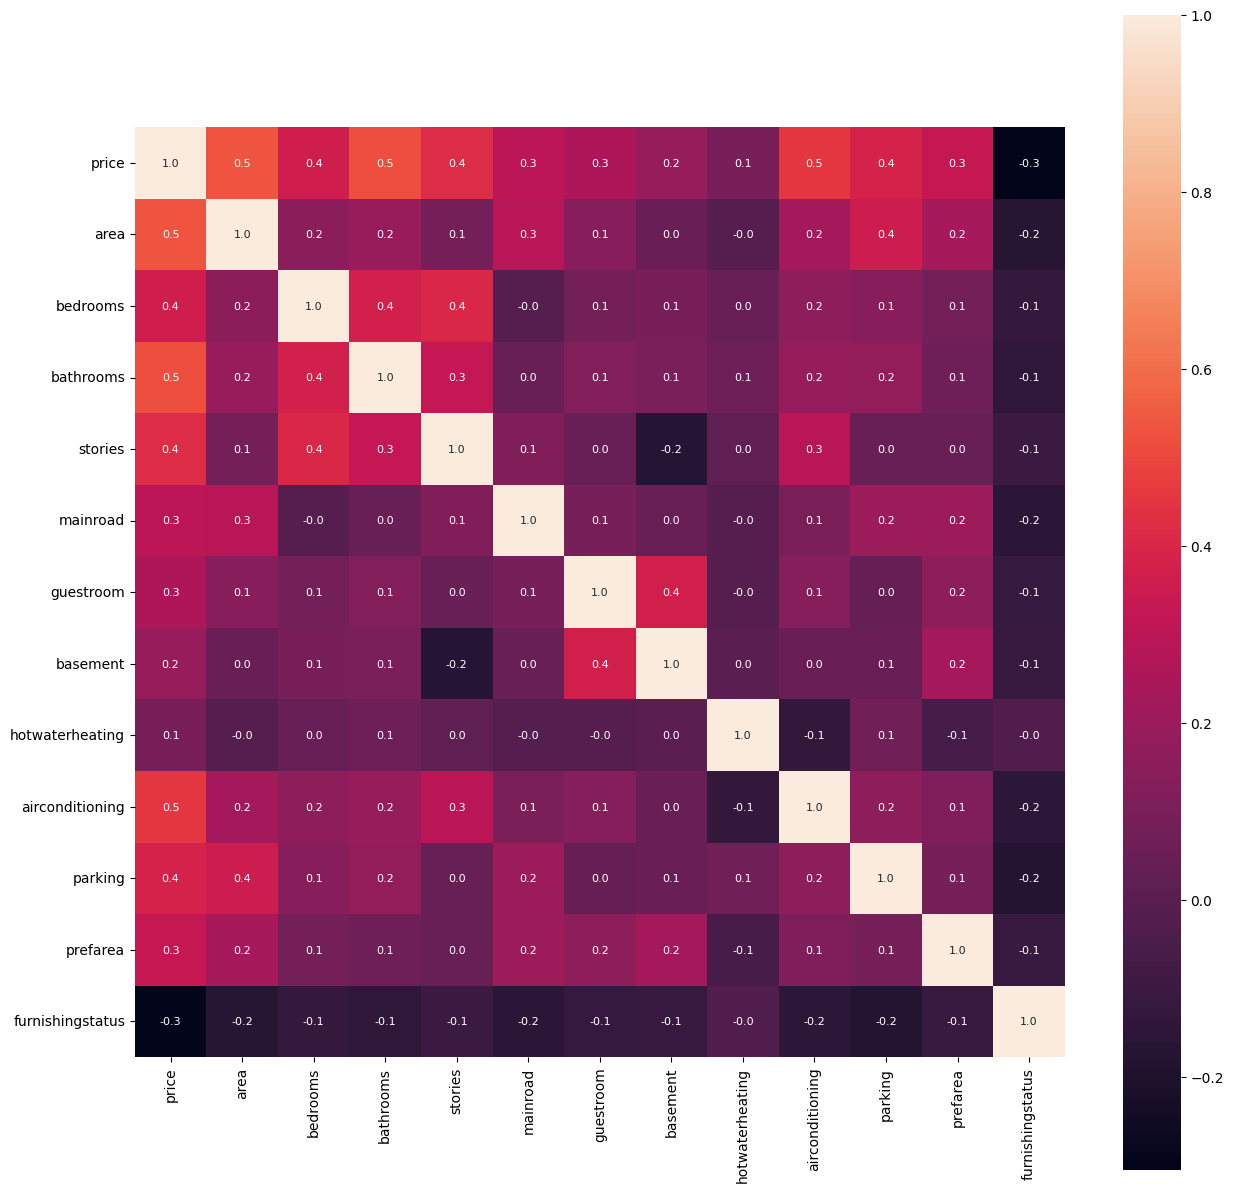

In [22]:

# Creating a heatmap to visualize the correlation between features

plt.figure(figsize=(15,15))
sb.heatmap(House.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


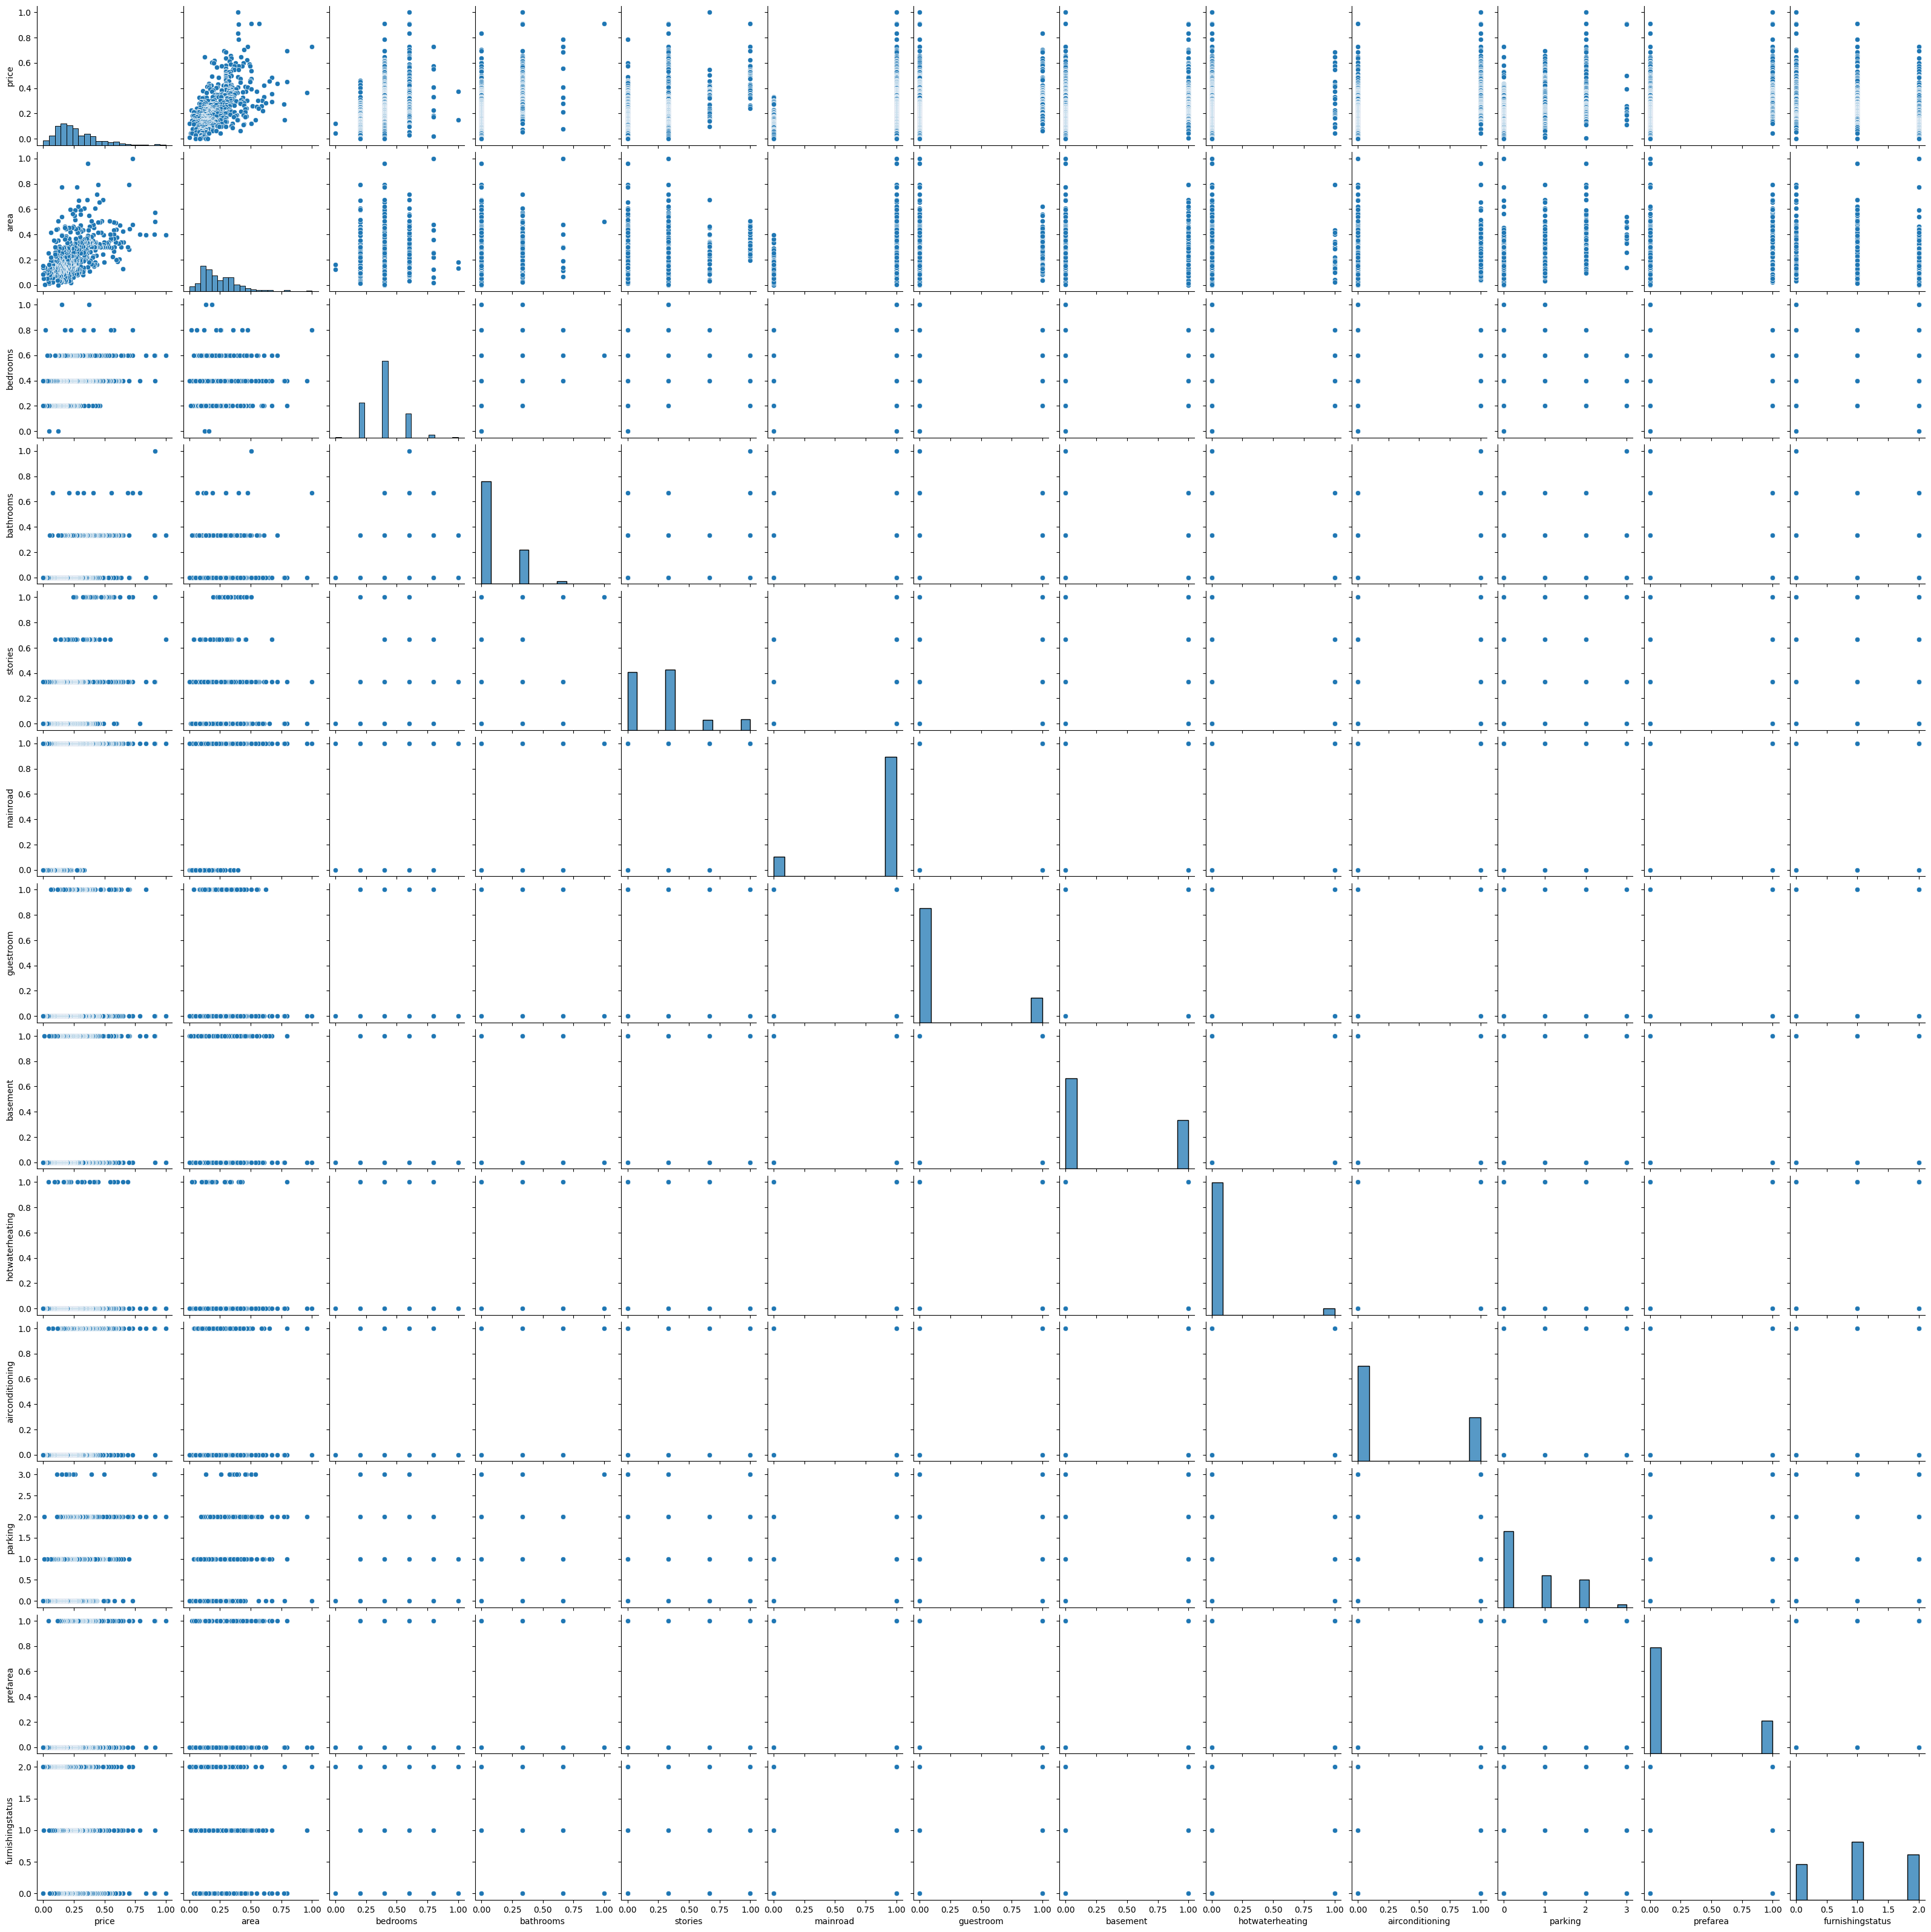

In [23]:
# Creating a pairplot to visualize relationships between different features

sb.pairplot(House)

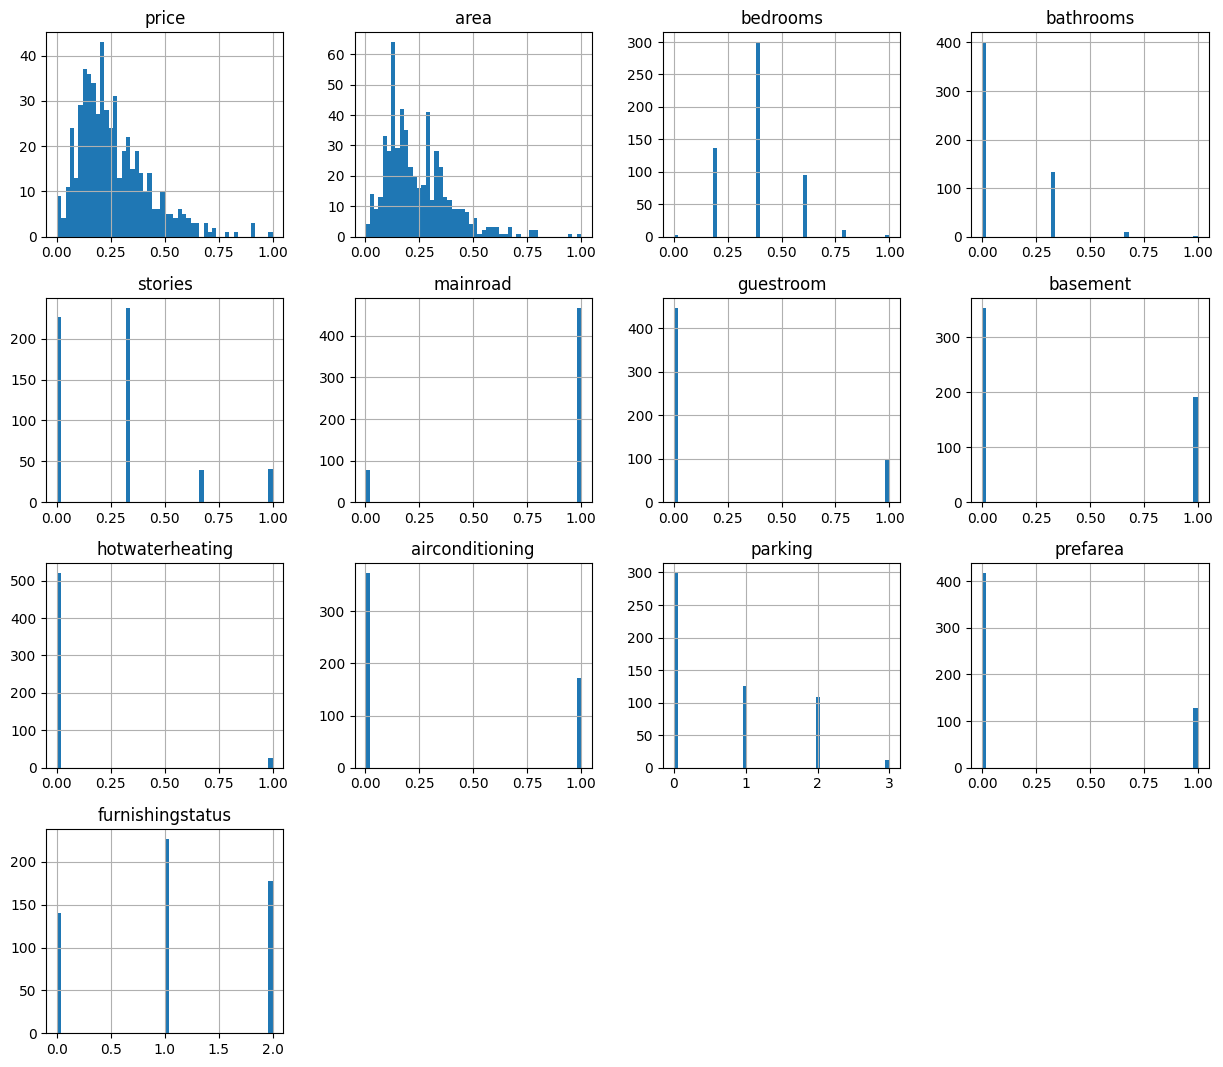

In [24]:
# Creating histograms for each feature to visualize their distributions

House.hist(figsize=(15,13),bins=50)
plt.show()

In [26]:
# Defining the Features/Independent Variables (X) and Target variable/Dependent Variable (y) 

x = House.drop('price',axis=1)
y = House['price']

In [27]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,2,1,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,3,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,2,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,3,1,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,2,0,0


In [28]:
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

In [29]:
# Splitting the dataset into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
# Training a Linear Regression model

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = model_linear.predict(X_test)

In [31]:
# Calculating evaluation metrics for the Linear Regression model

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear= mean_squared_error(y_test, y_pred_linear, squared=False)

print(f'R-squared (R^2): {r2_linear*100}')
print(f'Mean Absolute Error (MAE): {mae_linear}')
print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear}')

R-squared (R^2): 64.94754192267796
Mean Absolute Error (MAE): 0.08482075249315937
Mean Squared Error (MSE): 0.013281243729270737
Root Mean Squared Error (RMSE): 0.11524427850991448


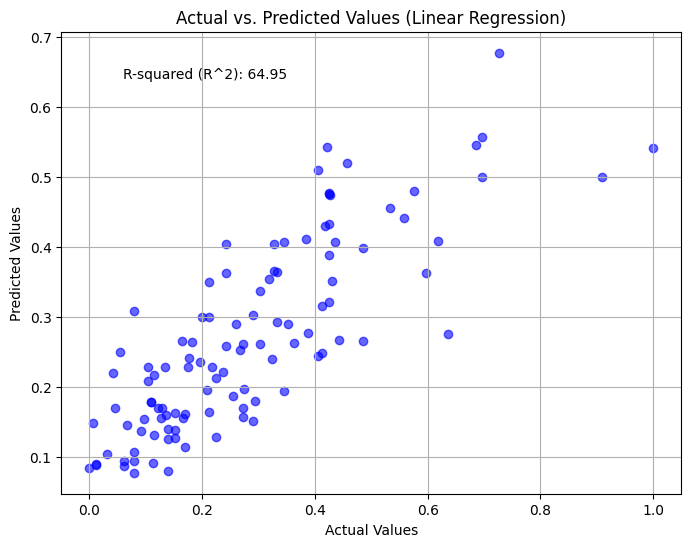

In [32]:
# Creating a scatter plot of actual vs. predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, c='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.text(0.1, 0.9, f'R-squared (R^2): {r2_linear*100:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

In [33]:
# Creating new data for prediction

new_data = pd.DataFrame({
    'area': [0.402062],
    'bedrooms': [0.4],
    'bathrooms': [0.666667],
    'stories': [0.0],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': [1]
},index=[0])

prediction = model_linear.predict(new_data)
print(f"Price (Min-Max Scaled): {prediction[0]}")

Price (Min-Max Scaled): 0.5767793083092302
